In [3]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [4]:
def plot_ROC_or_PR(tsv_path, metric_type='ROC'):

  def plot_curve(axis_1, axis_2, metric_type, plot_config = None):

    if metric_type == "ROC":
      config = {
          "legend_text": "ROC curve",
          "color": "blue",
          "xlab": "False Positive Rate",
          "ylab": "True Positive Rate",
          "title": "Receiver Operating Characteristic (ROC) Curve",
          "legend_location": "lower right"
      }

    elif metric_type == "PR":
      config = {
          "legend_text": "PR curve",
          "color": "darkorange",
          "xlab": "Recall",
          "ylab": "Precision",
          "title": "Precision-Recall Curve",
          "legend_location": "lower left"
      }
    
    elif metric_type == "PR_0.1%":
      config = {
          "legend_text": "PR curve (0.1%)",
          "color": "brown",
          "xlab": "Recall",
          "ylab": "Precision",
          "title": "Precision-Recall Curve (0.1%)",
          "legend_location": "lower left"
      }

    # option to include your own config dict
    if plot_config != None:
      config = plot_config

    area_under_curve = auc(axis_1, axis_2)
    plt.figure(figsize=(8, 6))
    legnd = config['legend_text']
    plt.plot(axis_1, axis_2, color=config['color'], lw=2, label=f'{legnd} (AUC = {area_under_curve:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(config['xlab'])
    plt.ylabel(config['ylab'])
    plt.title(config['title'])
    plt.legend(loc=config["legend_location"])
    plt.grid()
    plt.show()

  df = pd.read_csv(tsv_path, delimiter="\t", header=None)
  df.columns = ["Genes", "Corr", "Labels"]
  # tested with different random samples of the data, with smaller n the auroc values are much more variable per sample
#  df = df.sample(n=1000)

  y = df["Labels"].to_numpy()
  scores = df["Corr"].to_numpy()

  if metric_type == "ROC":
    fpr, tpr, _ = roc_curve(y, scores)
    plot_curve(fpr, tpr, metric_type = metric_type)
  elif metric_type == "PR":
    precision, recall, _ = precision_recall_curve(y, scores)
    plot_curve(recall, precision, metric_type = metric_type)
  elif metric_type == "PR_0.1%":
    df = df.head(int(len(df) * 0.001))
    y = df["Labels"].to_numpy()
    scores = df["Corr"].to_numpy()
    precision, recall, _ = precision_recall_curve(y, scores)
    plot_curve(recall, precision, metric_type = metric_type)

# 1. Genes found in > 150 [Cell type, tissue] && GOBP terms < 100 genes

In [2]:
tsv_path = "./genes_corr_positive.ct150.bp100.tsv"
df = pd.read_csv(tsv_path, delimiter="\t", header=None)
df.columns = ["Genes", "Corr", "Labels"]

# No NaNs present
df.dropna()

,Genes,Corr,Labels
0,"('ENSG00000198712', 'ENSG00000198938')",0.930511,1
1,"('ENSG00000198712', 'ENSG00000198804')",0.926362,1
2,"('ENSG00000198804', 'ENSG00000198938')",0.919042,1
3,"('ENSG00000198899', 'ENSG00000198938')",0.915087,0
4,"('ENSG00000198727', 'ENSG00000198899')",0.914491,1
...,...,...,...
86796895,"('ENSG00000073921', 'ENSG00000089157')",-0.609928,0
86796896,"('ENSG00000145425', 'ENSG00000163625')",-0.610108,0
86796897,"('ENSG00000137818', 'ENSG00000163625')",-0.615271,0
86796898,"('ENSG00000137154', 'ENSG00000163625')",-0.617182,0


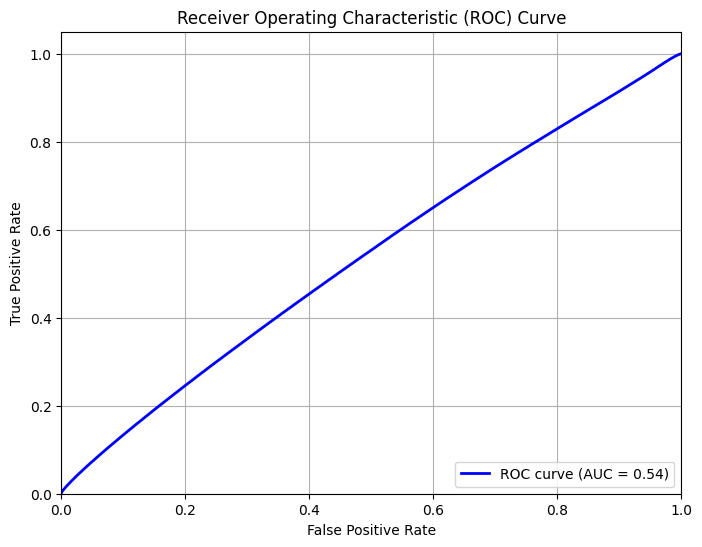

In [4]:
plot_ROC_or_PR(tsv_path)

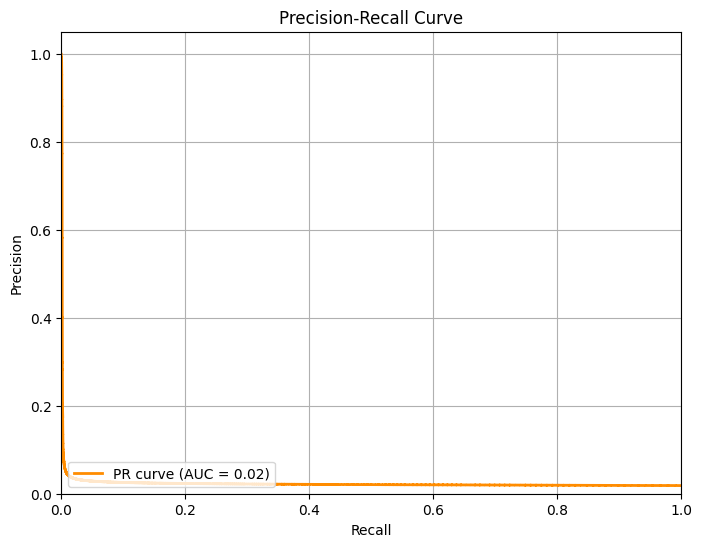

In [5]:
plot_ROC_or_PR(tsv_path, metric_type="PR")

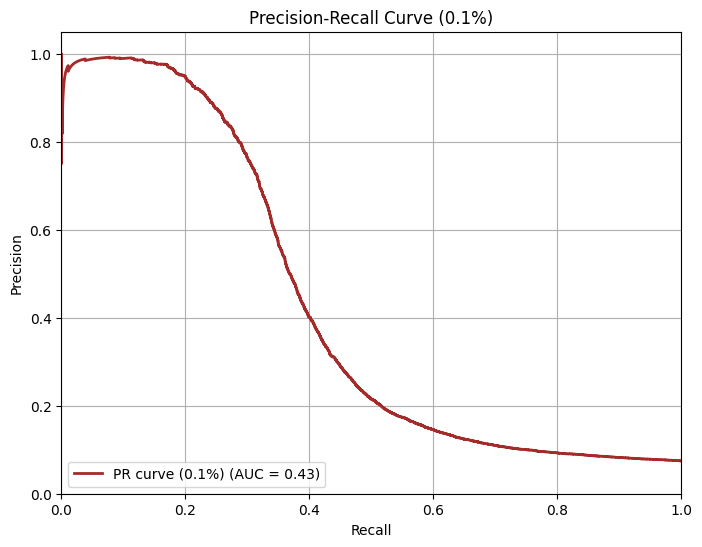

In [7]:
plot_ROC_or_PR(tsv_path, metric_type="PR_0.1%")

# 2. Genes found in > 1,500 [Cell type, tissue] && GOBP terms < 100 genes

In [6]:
tsv_path = "./genes_corr_positive.ct1500.bp100.tsv"
df = pd.read_csv(tsv_path, delimiter="\t", header=None)
df.columns = ["Genes", "Corr", "Labels"]

# No NaNs present
df.dropna()

,Genes,Corr,Labels
0,"('ENSG00000198712', 'ENSG00000198938')",0.930511,1
1,"('ENSG00000198712', 'ENSG00000198804')",0.926362,1
2,"('ENSG00000198804', 'ENSG00000198938')",0.919042,1
3,"('ENSG00000198899', 'ENSG00000198938')",0.915087,0
4,"('ENSG00000198727', 'ENSG00000198899')",0.914491,1
...,...,...,...
38180686,"('ENSG00000073921', 'ENSG00000089157')",-0.609928,0
38180687,"('ENSG00000145425', 'ENSG00000163625')",-0.610108,0
38180688,"('ENSG00000137818', 'ENSG00000163625')",-0.615271,0
38180689,"('ENSG00000137154', 'ENSG00000163625')",-0.617182,0


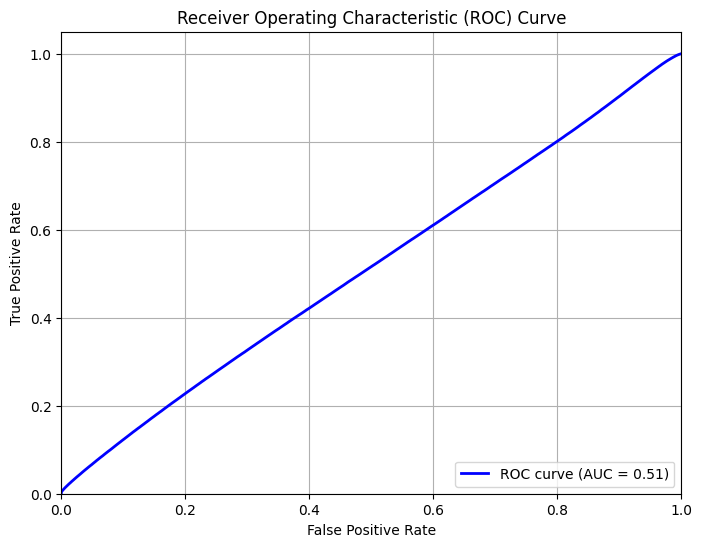

In [7]:
plot_ROC_or_PR(tsv_path)

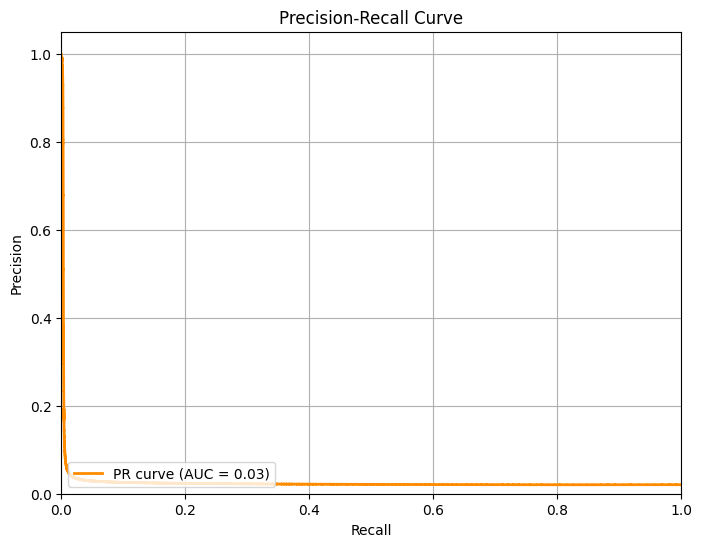

In [8]:
plot_ROC_or_PR(tsv_path, metric_type="PR")

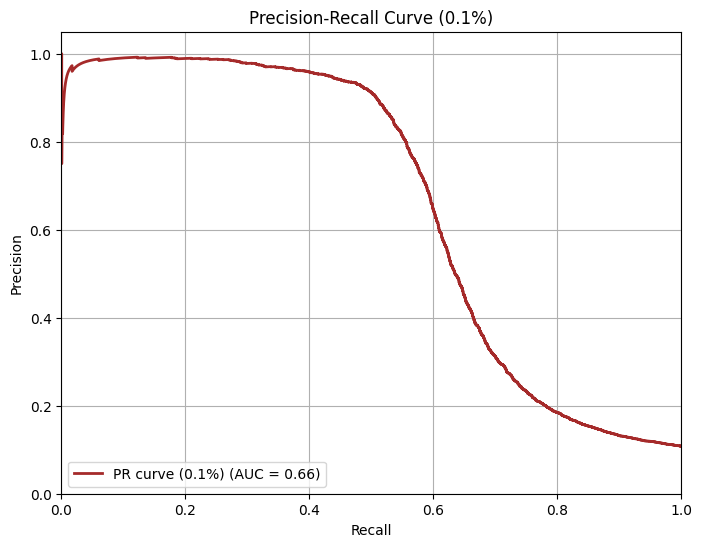

In [9]:
plot_ROC_or_PR(tsv_path, metric_type="PR_0.1%")